In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial import distance
import time

Let $X = \{X_i\}_{i \ge 1}$ be a homogeneous Poisson point process with intensity 1 on $\mathbb{R}^2$. The following function returns one realization of the Poisson points in a square. The size of the square is $n$ plus a value dependent on the distances of the points in the inner square. The array <code>x</code> conatains the points in the inner square and the array <code>z</code> the points in the outer envelope.

In [3]:
def onePath(n):
    #Generate points in the inner square
    numberOfPointsInInnerSquare = 0
    while numberOfPointsInInnerSquare <= 1:
        numberOfPointsInInnerSquare = np.random.poisson(n*n)
    xCoordinates = np.random.uniform(0,n,numberOfPointsInInnerSquare)
    yCoordinates = np.random.uniform(0,n,numberOfPointsInInnerSquare)
    x = np.vstack((xCoordinates, yCoordinates)).T
    
    #Calculate the required length bounds for the outer square
    addOnDistanceToSquare = 2
    
    #Divide the outer square setminus the inner square in 4 rectangles and generate points in each rectangle
    numberOfPointsInOuterRectangles = []
    for i in range(2):
        numberOfPointsInOuterRectangles.append(np.random.poisson(n*addOnDistanceToSquare))
    for i in range(2):
        numberOfPointsInOuterRectangles.append(np.random.poisson((n+2*addOnDistanceToSquare)*addOnDistanceToSquare))
    xCoordinates = np.random.uniform(-addOnDistanceToSquare,0,numberOfPointsInOuterRectangles[0])
    yCoordinates = np.random.uniform(0,n,numberOfPointsInOuterRectangles[0])
    xCoordinates = np.append(xCoordinates,np.random.uniform(n,n+addOnDistanceToSquare,numberOfPointsInOuterRectangles[1]))
    yCoordinates = np.append(yCoordinates,np.random.uniform(0,n,numberOfPointsInOuterRectangles[1]))
    xCoordinates = np.append(xCoordinates,np.random.uniform(-addOnDistanceToSquare,n+addOnDistanceToSquare,numberOfPointsInOuterRectangles[2]))
    yCoordinates = np.append(yCoordinates,np.random.uniform(-addOnDistanceToSquare,0,numberOfPointsInOuterRectangles[2]))
    xCoordinates = np.append(xCoordinates,np.random.uniform(-addOnDistanceToSquare,n+addOnDistanceToSquare,numberOfPointsInOuterRectangles[3]))
    yCoordinates = np.append(yCoordinates,np.random.uniform(n,n+addOnDistanceToSquare,numberOfPointsInOuterRectangles[3]))
    z = np.vstack((xCoordinates, yCoordinates)).T
    return x, z

Scatter of a random realization.

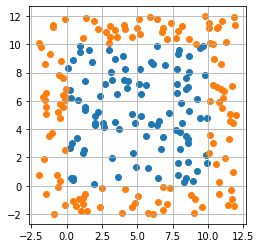

In [4]:
x,z = onePath(10)
plt.scatter(x.T[0],x.T[1])
plt.scatter(z.T[0],z.T[1])
plt.gcf().gca().set_aspect('equal')
plt.grid()
plt.show()

Executing the function <code>onePath(n)</code> over some number of paths.

In [7]:
np.random.seed(123)
numberOfPaths = 10000
n = 10
alpha = 15

H = []
X = []
Z = []
Y = []
YtoThePowerOfAlpha = []
EdgeMatrix = []
EdgeLengthMatrix = []
start = time.time()
for i in range(numberOfPaths):
    x,z = onePath(n)
    numberOfPointsInInnerSquare = len(x)
    numberOfPointsInOuterRectangles = len(z)
    distanceMatrix = distance.cdist(np.concatenate((x,z)),np.concatenate((x,z)))
    edgeMatrix = np.zeros((numberOfPointsInInnerSquare + numberOfPointsInOuterRectangles, numberOfPointsInInnerSquare + numberOfPointsInOuterRectangles))
    for j in range(numberOfPointsInInnerSquare + numberOfPointsInOuterRectangles):
        distanceMatrix[j,j] = math.inf
    for j in range(numberOfPointsInInnerSquare + numberOfPointsInOuterRectangles):
        for k in range(numberOfPointsInInnerSquare + numberOfPointsInOuterRectangles):
            isThereAnEdge = True
            for l in range(numberOfPointsInInnerSquare + numberOfPointsInOuterRectangles):
                if distanceMatrix[j,l] < distanceMatrix[j,k] and distanceMatrix[k,l] < distanceMatrix[j,k]:
                    isThereAnEdge = False
            if isThereAnEdge:
                edgeMatrix[j,k] = 1
    edgeLengthMatrix = np.zeros((numberOfPointsInInnerSquare + numberOfPointsInOuterRectangles, numberOfPointsInInnerSquare + numberOfPointsInOuterRectangles))
    for j in range(numberOfPointsInInnerSquare):
        for k in range(numberOfPointsInInnerSquare + numberOfPointsInOuterRectangles):
            if edgeMatrix[j,k] == 1:
                edgeLengthMatrix[j,k] = distanceMatrix[j,k]
    ytoThePowerOfAlpha = np.power(edgeLengthMatrix, alpha)
    #print(sum(ytoThePowerOfAlpha)/len(ytoThePowerOfAlpha))
    H.append(np.sum(ytoThePowerOfAlpha)/(n*n))
    X.append(x)
    Z.append(z)
    YtoThePowerOfAlpha.append(ytoThePowerOfAlpha)
    EdgeMatrix.append(edgeMatrix)
    EdgeLengthMatrix.append(edgeLengthMatrix)
end = time.time()
print("Elapsed time: " + str(end - start) + " seconds")

KeyboardInterrupt: 

Visualization of how the 5 largest values of $H_n$ occured. Circles are drawn around the <code>numberOfCircles</code> largest contributors.

1. largest H (= 132777.63141675477)
Number of points in inner square: 104


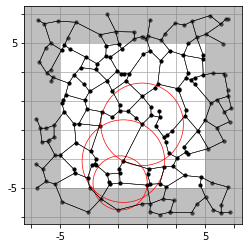

2. largest H (= 69866.57617672099)
Number of points in inner square: 99


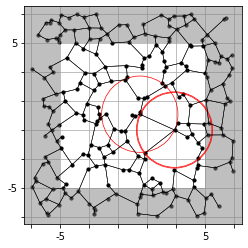

3. largest H (= 62724.18620832551)
Number of points in inner square: 95


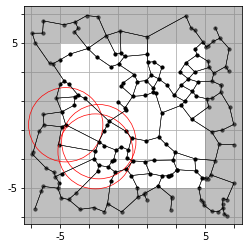

4. largest H (= 60834.254698615725)
Number of points in inner square: 109


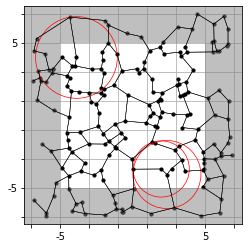

5. largest H (= 43731.68223431226)
Number of points in inner square: 90


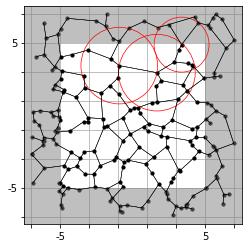

In [64]:
sortedH = sorted(H)
numberOfCircles = 3
#sortedH = H
#print(sortedH[len(H)-1])
for i in range(5):
    indexH = H.index(sortedH[len(H)-1-i])
    print(str(i+1) + ". largest H (= " + str(sortedH[len(H)-1-i]) + ")")
    print("Number of points in inner square: " + str(len(X[indexH])))
    
    fig=plt.figure(i)
    plt.scatter(X[indexH].T[0],X[indexH].T[1], color='black', s=10)
    plt.scatter(Z[indexH].T[0],Z[indexH].T[1], color='black', s=10)
    plt.gcf().gca().set_aspect('equal')
    plt.grid()
    plt.xlim([-2.5, 12.5])
    plt.xticks(ticks=[-2,0, 2, 4, 6, 8, 10,12], labels =["",-5,"","","","",5,""])
    plt.ylim([-2.5, 12.5])
    plt.yticks([-2,0, 2, 4, 6, 8, 10,12], labels =["",-5,"","","","",5,""])
    plt.axvspan(10,13, color='grey', alpha=0.5, lw=0)
    plt.axvspan(-3,0, color='grey', alpha=0.5, lw=0)
    plt.axhspan(ymin=10, ymax=13, xmin=1/6, xmax=5/6, color='grey', alpha=0.5, lw=0)
    plt.axhspan(ymin=-3, ymax=0, xmin=1/6, xmax=5/6, color='grey', alpha=0.5, lw=0)
    
    #connect nearest neighbors
    points = np.concatenate((X[indexH],Z[indexH]))
    edgeMatrix = np.copy(EdgeMatrix[indexH])
    for j in range(len(points)):
        for k in range(len(points)):
            if edgeMatrix[j][k] == 1:
                xValues = [points[j][0],points[k][0]]
                yValues = [points[j][1],points[k][1]]
                plt.plot(xValues,yValues, color='black',lw=.5)
    
    #draw a circle around the k biggest contributors
    maxMatrix = np.copy(EdgeLengthMatrix[indexH])
    for j in range(numberOfCircles):
        M = maxMatrix.max()
        I = np.unravel_index(np.argmax(maxMatrix, axis=None), maxMatrix.shape)
        radius = M
        center = X[indexH][I[0]]
        circle = plt.Circle(center, radius, color='r', fill = False, lw=0.7)
        plt.gcf().gca().add_artist(circle)
        maxMatrix[I] = 0
    #print("X_i:")
    #print(X[indexH])
    plt.gca().set_axisbelow(True)
    #if i==0:
        #tikzplotlib.save('largeH.tex')
        #fig.savefig('largeH.pdf',bbox_inches='tight')
        #fig.savefig('highH.eps', bbox_inches='tight')
    plt.show()

Visualization of how the 5 lowest values of $H_n$ occured.

1. smallest H (= 137.89126999619293)
Number of points in inner square: 104


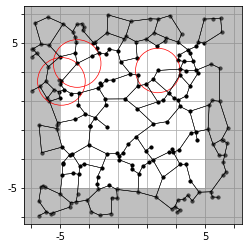

2. smallest H (= 203.07649844875158)
Number of points in inner square: 102


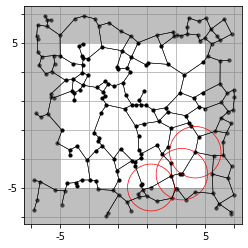

3. smallest H (= 204.10503566218017)
Number of points in inner square: 109


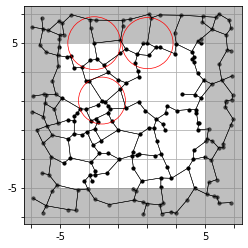

4. smallest H (= 217.1186639686757)
Number of points in inner square: 104


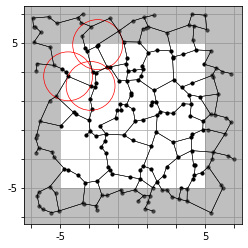

5. smallest H (= 237.27918853461327)
Number of points in inner square: 99


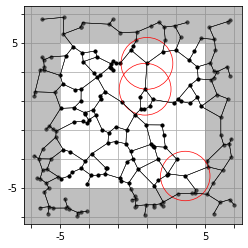

In [66]:
sortedH = sorted(H, reverse=True)
numberOfCircles = 3
for i in range(5):
    indexH = H.index(sortedH[len(H)-1-i])
    print(str(i+1) + ". smallest H (= " + str(sortedH[len(H)-1-i]) + ")")
    print("Number of points in inner square: " + str(len(X[indexH])))
    
    fig=plt.figure(i)
    plt.scatter(X[indexH].T[0],X[indexH].T[1], color='black', s=10)
    plt.scatter(Z[indexH].T[0],Z[indexH].T[1], color='black', s=10)
    plt.gcf().gca().set_aspect('equal')
    plt.grid()
    plt.xlim([-2.5, 12.5])
    plt.xticks(ticks=[-2,0, 2, 4, 6, 8, 10,12], labels =["",-5,"","","","",5,""])
    plt.ylim([-2.5, 12.5])
    plt.yticks([-2,0, 2, 4, 6, 8, 10,12], labels =["",-5,"","","","",5,""])
    plt.axvspan(10,13, color='grey', alpha=0.5, lw=0)
    plt.axvspan(-3,0, color='grey', alpha=0.5, lw=0)
    plt.axhspan(ymin=10, ymax=13, xmin=1/6, xmax=5/6, color='grey', alpha=0.5, lw=0)
    plt.axhspan(ymin=-3, ymax=0, xmin=1/6, xmax=5/6, color='grey', alpha=0.5, lw=0)
    
    #connect nearest neighbors
    points = np.concatenate((X[indexH],Z[indexH]))
    edgeMatrix = np.copy(EdgeMatrix[indexH])
    for j in range(len(points)):
        for k in range(len(points)):
            if edgeMatrix[j][k] == 1:
                xValues = [points[j][0],points[k][0]]
                yValues = [points[j][1],points[k][1]]
                plt.plot(xValues,yValues, color='black',lw=.5)
    
    #draw a circle around the k biggest contributors
    maxMatrix = np.copy(EdgeLengthMatrix[indexH])
    for j in range(numberOfCircles):
        M = maxMatrix.max()
        I = np.unravel_index(np.argmax(maxMatrix, axis=None), maxMatrix.shape)
        radius = M
        center = X[indexH][I[0]]
        circle = plt.Circle(center, radius, color='r', fill = False, lw=0.7)
        plt.gcf().gca().add_artist(circle)
        maxMatrix[I] = 0
    plt.gca().set_axisbelow(True)
    #if i==0:
        #tikzplotlib.save('smallH.tex', bbox_inches='tight')
        #fig.savefig('smallH.pdf',bbox_inches='tight')
        #fig.savefig('lowH.eps')
    plt.show()

Creating Tikz picture

In [7]:
indexH = H.index(sorted(H)[len(H)-1])
points = np.concatenate((X[indexH],Z[indexH]))
edges = []
distanceMatrix = distance.cdist(points,points)
for j in range(len(points)):
    distanceMatrix[j,j] = math.inf
    edges.append([points[j][0],points[np.argmin(distanceMatrix[j])][0],points[j][1],points[np.argmin(distanceMatrix[j])][1]])

numberofCircles = 3
indexMaxY = np.argpartition(Y[indexH], -numberOfCircles)
radii, centers = [],[]
for j in range(numberOfCircles):
    radii.append(Y[indexH][indexMaxY[len(Y[indexH])-1-j]])
    centers.append(X[indexH][indexMaxY[len(Y[indexH])-1-j]])
    
borders_string = ["\\fill[fill=gray!20] (-2.5,-2.5) rectangle ++(2.5,15);\n","\\fill[fill=gray!20] (0,-2.5) rectangle ++(10,2.5);\n",
                  "\\fill[fill=gray!20] (10,-2.5) rectangle ++(2.5,15);\n","\\fill[fill=gray!20] (0,10) rectangle ++(10,2.5);\n"]

points_string = ["\\fill ({0:1.2f}, {1:1.2f}) circle (2pt);\n".format(points[i][0], points[i][1])
                 for i in range(len(points))]

edges_string = ["\\draw[-{{Latex[scale=0.5]}}] ({0:1.2f}, {1:1.2f}) -- ({2:1.2f}, {3:1.2f});\n".format(edges[i][0],edges[i][2],edges[i][1],edges[i][3])
                for i in range(len(edges))]

circles_string = ["\\draw[color=red!60] ({0:1.2f}, {1:1.2f}) circle ({2:1.2f});\n".format(centers[i][0], centers[i][1], radii[i])
                for i in range(len(radii))]

tikz = ''.join(borders_string + points_string + edges_string + circles_string)
tikz = '\\begin{tikzpicture}\n' + tikz + '\\end{tikzpicture}\n'

fname = 'largeH.tex'

f = open(fname, "w")
f.write(tikz)
f.close()

!pdflatex evolFig.tex

^C


In [ ]:
indexH = H.index(sorted(H, reverse=True)[len(H)-1])
points = np.concatenate((X[indexH],Z[indexH]))
edges = []
distanceMatrix = distance.cdist(points,points)
for j in range(len(points)):
    distanceMatrix[j,j] = math.inf
    edges.append([points[j][0],points[np.argmin(distanceMatrix[j])][0],points[j][1],points[np.argmin(distanceMatrix[j])][1]])

numberofCircles = 3
indexMaxY = np.argpartition(Y[indexH], -numberOfCircles)
radii, centers = [],[]
for j in range(numberOfCircles):
    radii.append(Y[indexH][indexMaxY[len(Y[indexH])-1-j]])
    centers.append(X[indexH][indexMaxY[len(Y[indexH])-1-j]])

borders_string = ["\\fill[fill=gray!20] (-2.5,-2.5) rectangle ++(2.5,15);\n","\\fill[fill=gray!20] (0,-2.5) rectangle ++(10,2.5);\n",
                  "\\fill[fill=gray!20] (10,-2.5) rectangle ++(2.5,15);\n","\\fill[fill=gray!20] (0,10) rectangle ++(10,2.5);\n"]

points_string = ["\\fill ({0:1.2f}, {1:1.2f}) circle (2pt);\n".format(points[i][0], points[i][1])
                 for i in range(len(points))]

edges_string = ["\\draw[-{{Latex[scale=0.5]}}] ({0:1.2f}, {1:1.2f}) -- ({2:1.2f}, {3:1.2f});\n".format(edges[i][0],edges[i][2],edges[i][1],edges[i][3])
                for i in range(len(edges))]

circles_string = ["\\draw[color=red!60] ({0:1.2f}, {1:1.2f}) circle ({2:1.2f});\n".format(centers[i][0], centers[i][1], radii[i])
                for i in range(len(radii))]

tikz = ''.join(points_string + edges_string + circles_string)
tikz = '\\begin{tikzpicture}\n' + tikz + '\\end{tikzpicture}\n'

fname = 'smallH.tex'

f = open(fname, "w")
f.write(tikz)
f.close()

!pdflatex evolFig.tex

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

indexH = H.index(find_nearest(H,np.mean(H)))
points = np.concatenate((X[indexH],Z[indexH]))
edges = []
distanceMatrix = distance.cdist(points,points)
for j in range(len(points)):
    distanceMatrix[j,j] = math.inf
    edges.append([points[j][0],points[np.argmin(distanceMatrix[j])][0],points[j][1],points[np.argmin(distanceMatrix[j])][1]])

numberofCircles = 3
indexMaxY = np.argpartition(Y[indexH], -numberOfCircles)
radii, centers = [],[]
for j in range(numberOfCircles):
    radii.append(Y[indexH][indexMaxY[len(Y[indexH])-1-j]])
    centers.append(X[indexH][indexMaxY[len(Y[indexH])-1-j]])

points_string = ["\\fill ({0:1.2f}, {1:1.2f}) circle (2pt);\n".format(points[i][0], points[i][1])
                 for i in range(len(points))]

edges_string = ["\\draw[-{{Latex[scale=0.5]}}] ({0:1.2f}, {1:1.2f}) -- ({2:1.2f}, {3:1.2f});\n".format(edges[i][0],edges[i][2],edges[i][1],edges[i][3])
                for i in range(len(edges))]

circles_string = ["\\draw[color=red!60] ({0:1.2f}, {1:1.2f}) circle ({2:1.2f});\n".format(centers[i][0], centers[i][1], radii[i])
                for i in range(len(radii))]

tikz = ''.join(points_string + edges_string + circles_string)
tikz = '\\begin{tikzpicture}\n' + tikz + '\\end{tikzpicture}\n'

fname = 'typical2H.tex'

f = open(fname, "w")
f.write(tikz)
f.close()

!pdflatex evolFig.tex

In [ ]:
indexH = 0
points = np.concatenate((X[indexH],Z[indexH]))
edges = []
distanceMatrix = distance.cdist(points,points)
for j in range(len(points)):
    distanceMatrix[j,j] = math.inf
    edges.append([points[j][0],points[np.argmin(distanceMatrix[j])][0],points[j][1],points[np.argmin(distanceMatrix[j])][1]])

numberofCircles = 3
indexMaxY = np.argpartition(Y[indexH], -numberOfCircles)
radii, centers = [],[]
for j in range(numberOfCircles):
    radii.append(Y[indexH][indexMaxY[len(Y[indexH])-1-j]])
    centers.append(X[indexH][indexMaxY[len(Y[indexH])-1-j]])

points_string = ["\\fill ({0:1.2f}, {1:1.2f}) circle (2pt);\n".format(points[i][0], points[i][1])
                 for i in range(len(points))]

edges_string = ["\\draw[-{{Latex[scale=0.5]}}] ({0:1.2f}, {1:1.2f}) -- ({2:1.2f}, {3:1.2f});\n".format(edges[i][0],edges[i][2],edges[i][1],edges[i][3])
                for i in range(len(edges))]

circles_string = ["\\draw[color=red!60] ({0:1.2f}, {1:1.2f}) circle ({2:1.2f});\n".format(centers[i][0], centers[i][1], radii[i])
                for i in range(len(radii))]

tikz = ''.join(points_string + edges_string + circles_string)
tikz = '\\begin{tikzpicture}\n' + tikz + '\\end{tikzpicture}\n'

fname = 'typicalH.tex'

f = open(fname, "w")
f.write(tikz)
f.close()

!pdflatex evolFig.tex